In [1]:
!wget https://zenodo.org/record/7711810/files/EuroSAT_RGB.zip?download=1 -O EuroSAT_RGB.zip
!unzip EuroSAT_RGB.zip -d data/


Streaming output truncated to the last 5000 lines.
  inflating: data/EuroSAT_RGB/Residential/Residential_489.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_1573.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_270.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_516.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2683.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_502.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2697.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_264.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2867.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2873.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_258.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2126.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_1349.jpg  
  inflating: data/EuroSAT_RGB/Residential/Residential_2640.jpg  
  inflating: data/EuroSAT_RGB/Residential/Res

Number of Category 10
Category: ['Highway', 'AnnualCrop', 'HerbaceousVegetation', 'Industrial', 'PermanentCrop', 'SeaLake', 'Forest', 'Pasture', 'Residential', 'River']


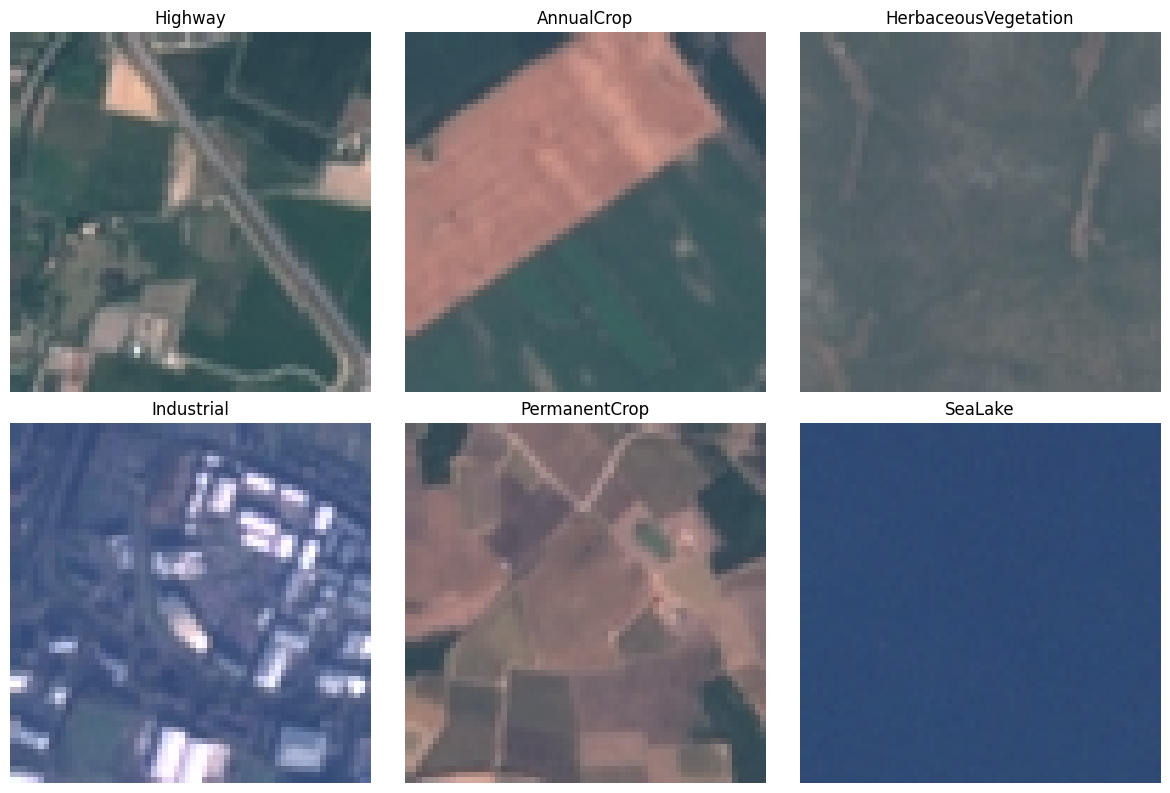

In [2]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

data_dir = 'data/EuroSAT_RGB'

categories = os.listdir(data_dir)
print(f"Number of Category {len(categories)}")
print("Category:", categories)

plt.figure(figsize=(12, 8))
for i, category in enumerate(categories[:6]):
    category_path = os.path.join(data_dir, category)
    image_name = random.choice(os.listdir(category_path))
    image_path = os.path.join(category_path, image_name)
    image = Image.open(image_path)

    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
import shutil
import os

original_dataset_dir = 'data/EuroSAT_RGB'
base_dir = 'data_split'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Create folders for train and test
for category in os.listdir(original_dataset_dir):
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Split and copy images
for category in os.listdir(original_dataset_dir):
    category_path = os.path.join(original_dataset_dir, category)
    images = os.listdir(category_path)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(train_dir, category, img))

    for img in test_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(test_dir, category, img))

print("✅ Data successfully split into train and test.")


✅ Data successfully split into train and test.


In [4]:
from tensorflow.keras import layers, models

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(categories), activation='softmax')  # Number of categories
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 684,490 (2.61 MB)

 Trainable params: 684,490 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data_split/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'data_split/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


675/675 ━━━━━━━━━━━━━━━━━━━━ 161s 235ms/step - accuracy: 0.4116 - loss: 1.5144 - val_accuracy: 0.6001 - val_loss: 1.0601
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 203s 301ms/step - accuracy: 0.7020 - loss: 0.8155 - val_accuracy: 0.7686 - val_loss: 0.6377
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 262s 301ms/step - accuracy: 0.7633 - loss: 0.6570 - val_accuracy: 0.7762 - val_loss: 0.6446
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 202s 299ms/step - accuracy: 0.8044 - loss: 0.5453 - val_accuracy: 0.8012 - val_loss: 0.5612
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 202s 299ms/step - accuracy: 0.8336 - loss: 0.4683 - val_accuracy: 0.8289 - val_loss: 0.4721
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 202s 299ms/step - accuracy: 0.8565 - loss: 0.4064 - val_accuracy: 0.8382 - val_loss: 0.4724
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 203s 301ms/step - accuracy: 0.8704 - loss: 0.3606 - val_accuracy: 0.8566 - val_loss: 0.4169
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 155s 230ms/step - accuracy: 0.8861 - loss: 0.32

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


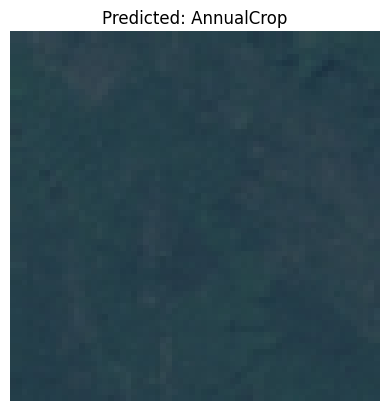

Predicted class: AnnualCrop


In [9]:
import os
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# اختيار صورة عشوائية من مجلد Forest
img_dir = 'data_split/test/Forest'
img_name = random.choice(os.listdir(img_dir))  # اختر صورة عشوائيًا
img_path = os.path.join(img_dir, img_name)

# Load and resize the image
img = image.load_img(img_path, target_size=(64, 64))  # Resize الصورة

# Convert the image to an array and normalize it
img_array = image.img_to_array(img) / 255.0  # تحويل الصورة إلى Array وNormalizing

# Expand the dimensions to match the model input (add batch dimension)
img_array = np.expand_dims(img_array, axis=0)  # إضافة البُعد الجديد (batch dimension)

# Predict the class of the image
prediction = model.predict(img_array)

# Get the predicted class label
predicted_class_index = np.argmax(prediction, axis=1)[0]
predicted_class = categories[predicted_class_index]

# Display the image and the prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

# Print the prediction result
print(f"Predicted class: {predicted_class}")


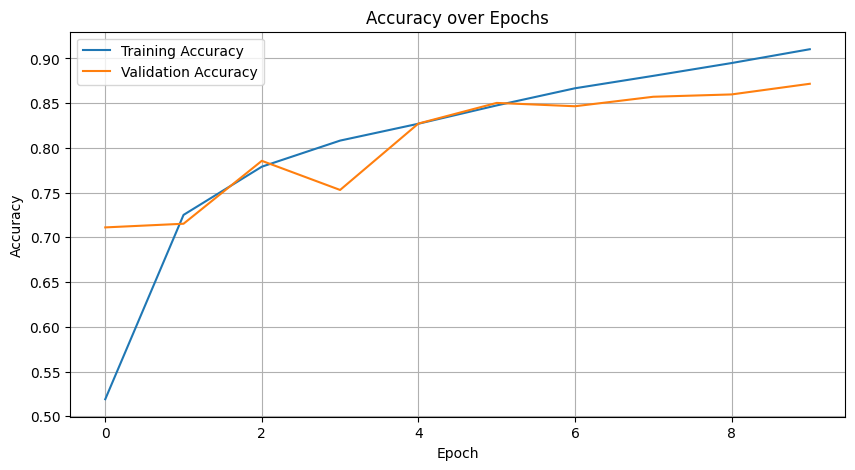

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


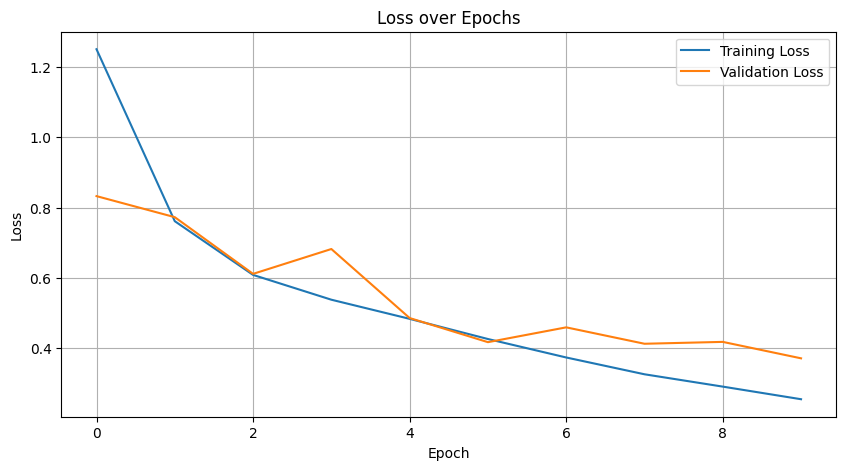

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
categories = train_generator.class_indices
print(categories)


{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


In [13]:
from tensorflow.keras.utils import load_img, img_to_array

Saving imj.jpg to imj.jpg


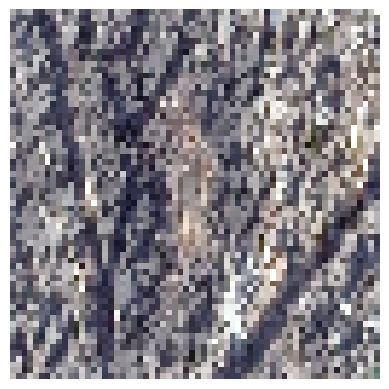

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This image belongs to the category: Residential


In [14]:
from google.colab import files
uploaded = files.upload()

img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(64, 64))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

categories = list(train_generator.class_indices.keys())
print("This image belongs to the category:", categories[predicted_class])


In [15]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [16]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd

st.title("My Streamlit App")
st.write("Welcome to my app!")


Writing app.py


In [17]:
!pip install pyngrok

In [26]:
model.save('model.h5')

In [27]:
%%writefile app.py
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

# Load trained model
model = load_model('model.h5')

# Class names for prediction output
class_names = ['Annual Crop', 'Forest', 'Herbaceous Vegetation', 'Highway',
               'Industrial', 'Pasture', 'Permanent Crop', 'Residential',
               'River', 'Sea/Lake']

# Streamlit app UI
st.title("Land Type Classification 🌍")
st.write("Upload an image (64x64 or larger), and the model will predict its land type.")

# Upload image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Show uploaded image
    img = Image.open(uploaded_file)
    st.image(img, caption='Uploaded Image.', use_column_width=True)

    # Preprocess the image
    img = img.resize((64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    st.success(f"Prediction: **{predicted_class}**")


Overwriting app.py


In [29]:
# Replace YOUR_AUTHTOKEN_HERE with your actual authtoken from ngrok
!ngrok config add-authtoken 2w9GRdIpqsnfQaL0UAKkRNzPmEl_4uhtNKr9HwKbfFqtkUoVS


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [30]:
# Import and setup ngrok
from pyngrok import ngrok
import os

# Run Streamlit app
os.system("streamlit run app.py &")

# Open tunnel on port 8501
public_url = ngrok.connect(8501)
print("Streamlit app is live at:", public_url)


Streamlit app is live at: NgrokTunnel: "https://ca42-34-86-252-102.ngrok-free.app" -> "http://localhost:8501"
